## Temperature 2m above surface

Exploring the data of var167 for both slo0059 and tes0004 and playing around with different types of plots to this. 

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs

In [14]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var167.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var167.nc')
da.time.head

<bound method DataArray.head of <xarray.DataArray 'time' (time: 22200)> Size: 178kB
array([70010131.994444, 70010228.994444, 70010331.994444, ..., 88501031.994444,
       88501130.994444, 88501231.994444])
Coordinates:
  * time     (time) float64 178kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T>

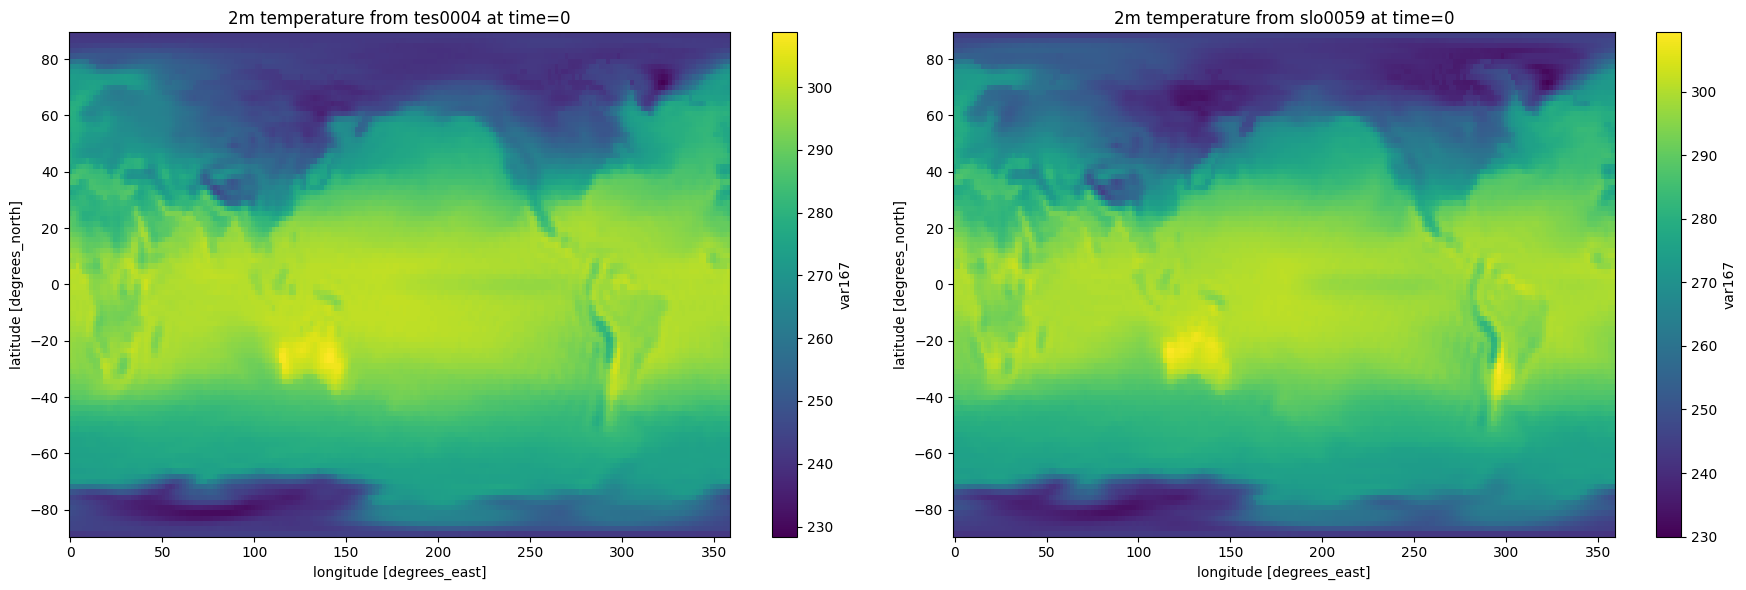

In [5]:
var_tes = ds['var167']
var_slo = da['var167']

# Select a single time step (e.g., the first one)
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # ← missing parenthesis fixed

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("2m temperature from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("2m temperature from slo0059 at time=0")

plt.tight_layout()
plt.show()

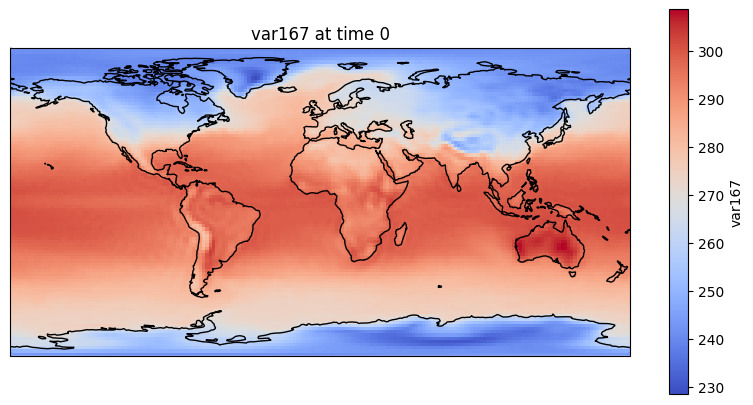

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var167'].isel(time=0)

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'var167'})
ax.coastlines()
ax.set_title('var167 at time 0')
plt.show()

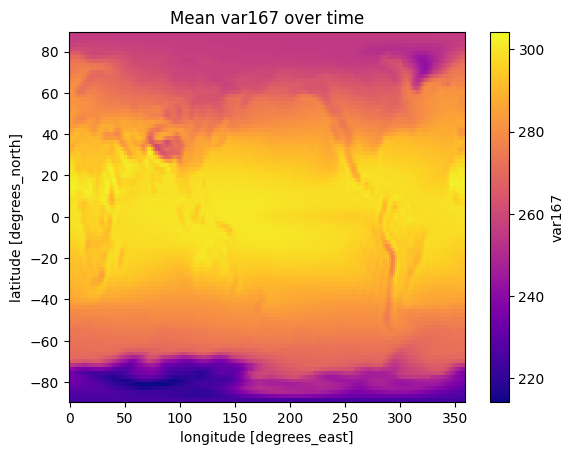

In [7]:
mean_map = ds['var167'].mean(dim='time')
mean_map.plot(cmap='plasma')
plt.title("Mean var167 over time")
plt.show()

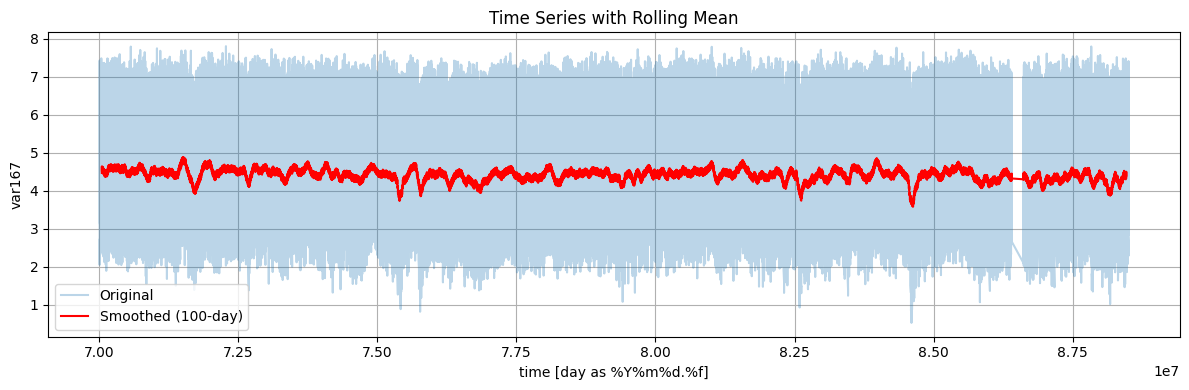

In [8]:
ts = ds["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

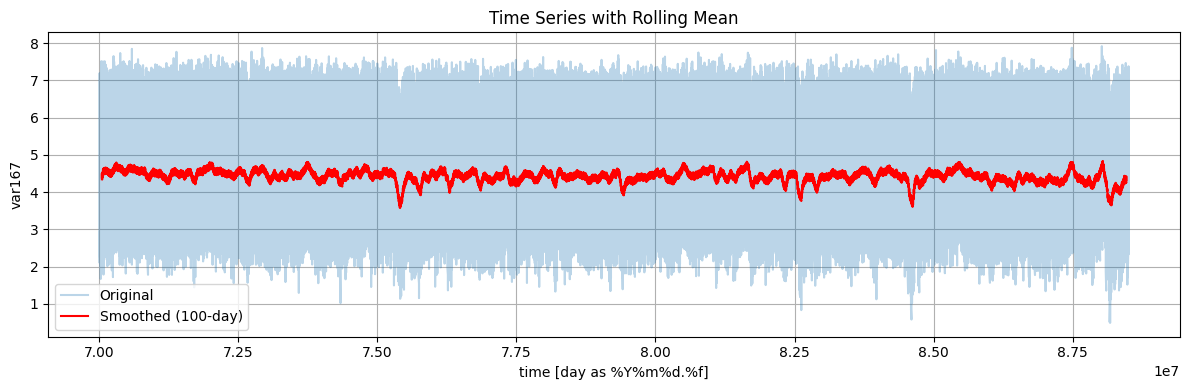

In [11]:
ts1 = da["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts1.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts1.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

# Now calculate the numeric value corresponding to year 1250 and 1750
def year_to_numeric(year):
    return first_date_num + year * units_per_year

numeric_1250 = year_to_numeric(1250)
numeric_1750 = year_to_numeric(1750)

print(f"Numeric time for year 1250: {numeric_1250}")
print(f"Numeric time for year 1750: {numeric_1750}")

Numeric time for year 1250: 82504117.4864865
Numeric time for year 1750: 87501712.08108108


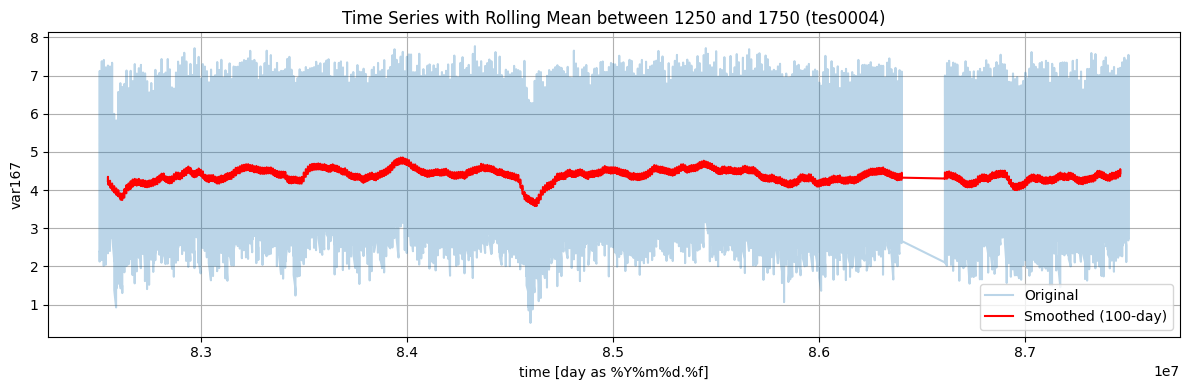

In [20]:
time_1250 = 82504117.4864865  # example, replace with your actual value
time_1750 = 87501712.08108108  # example, replace with your actual value

time_mask = (ds.time >= time_1250) & (ds.time <= time_1750)
ts_1250_1750 = ds['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1750.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1750.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1750 (tes0004)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

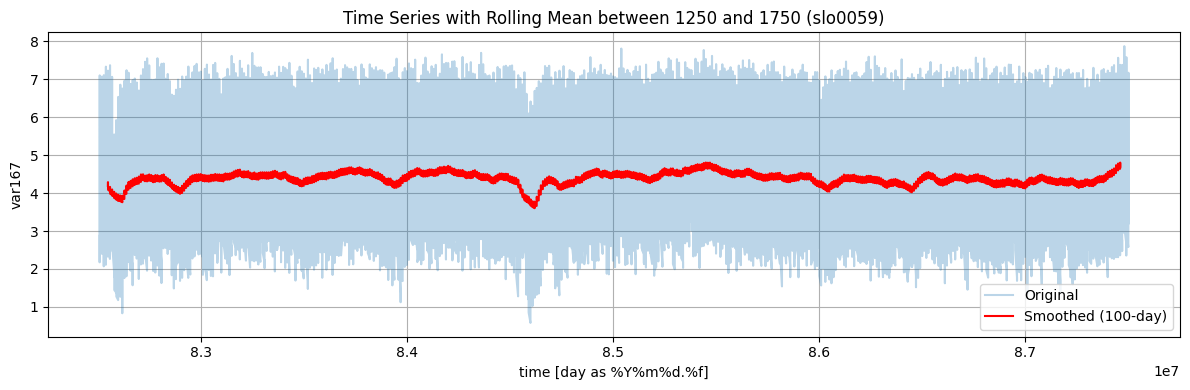

In [19]:
time_1250 = 82504117.4864865  # example, replace with your actual value
time_1750 = 87501712.08108108  # example, replace with your actual value

time_mask = (da.time >= time_1250) & (da.time <= time_1750)
ts_1250_1750 = da['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1750.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1750.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1750 (slo0059)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

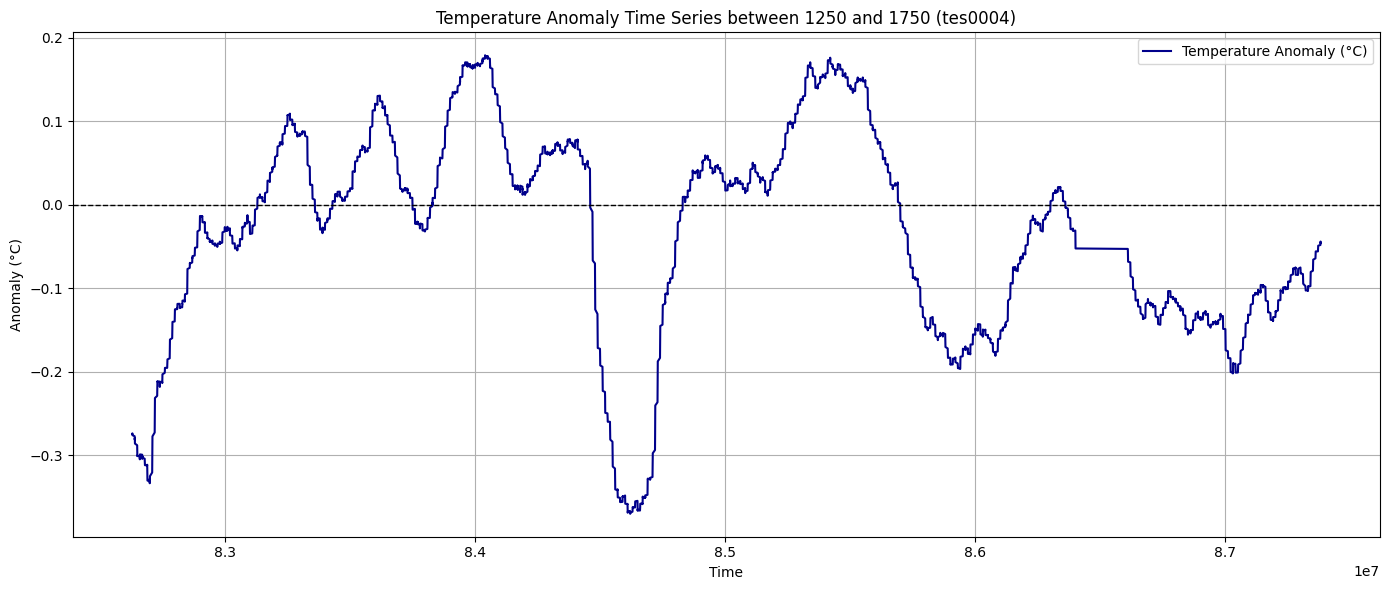

In [25]:
baseline = ts.mean()
anomaly = ts.sel(time=(ds.time >= time_1250) & (ds.time <= numeric_1750)) - baseline

anomaly_smoothed = anomaly.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
anomaly_smoothed.plot(label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1750 (tes0004)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

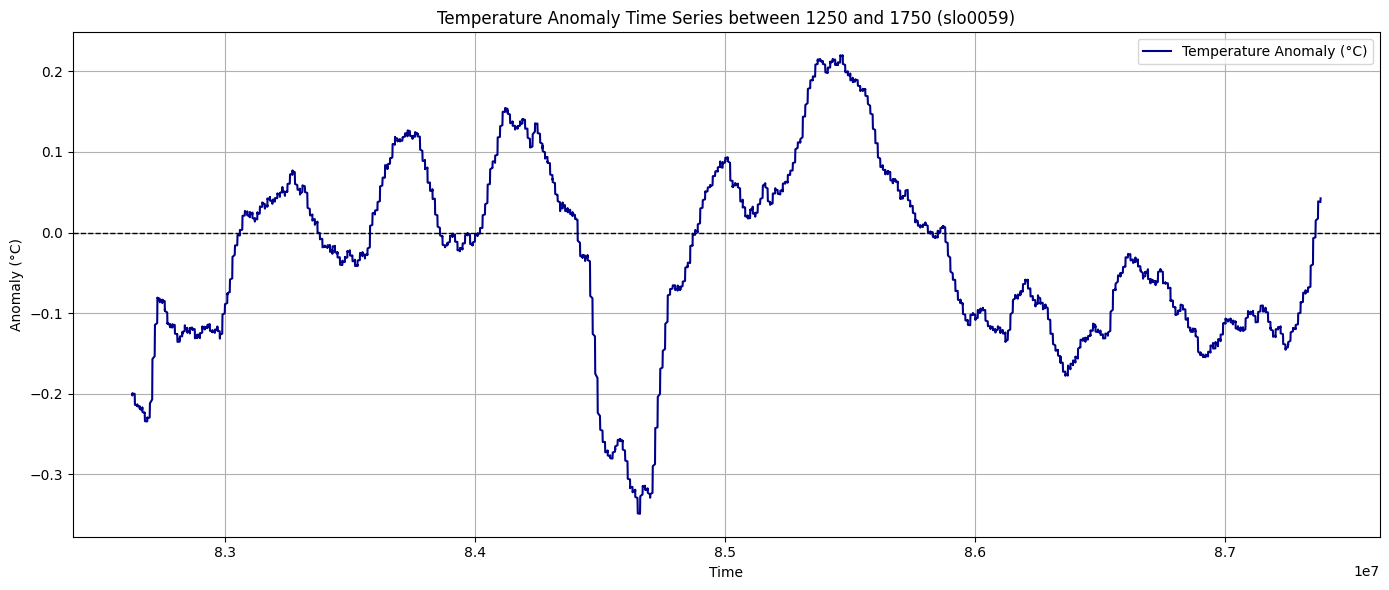

In [26]:
baseline1 = ts1.mean()
anomaly1 = ts1.sel(time=(da.time >= time_1250) & (da.time <= numeric_1750)) - baseline1

anomaly_smoothed1 = anomaly1.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
anomaly_smoothed1.plot(label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1750 (slo0059)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

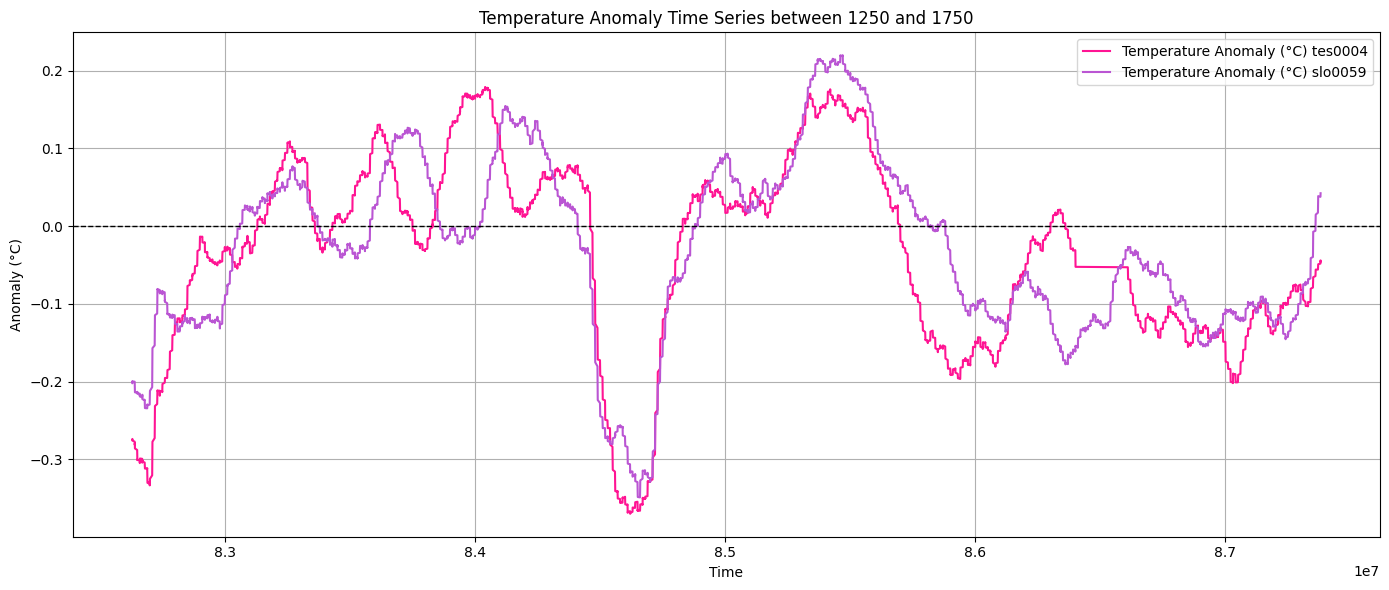

In [39]:
plt.figure(figsize=(14, 6))
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1750')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
float_time = ds.time.values
int_time = float_time.astype(int)  # Take only YYYYMMDD

# Extract year by integer division
raw_years = int_time // 10000

# Correct offset: map to actual years (e.g., 7001 → 1001)
years = raw_years - 7000

In [33]:
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 1701, 1721, 1739]
volcano_times = ds.time.values[np.isin(years, volcano)]

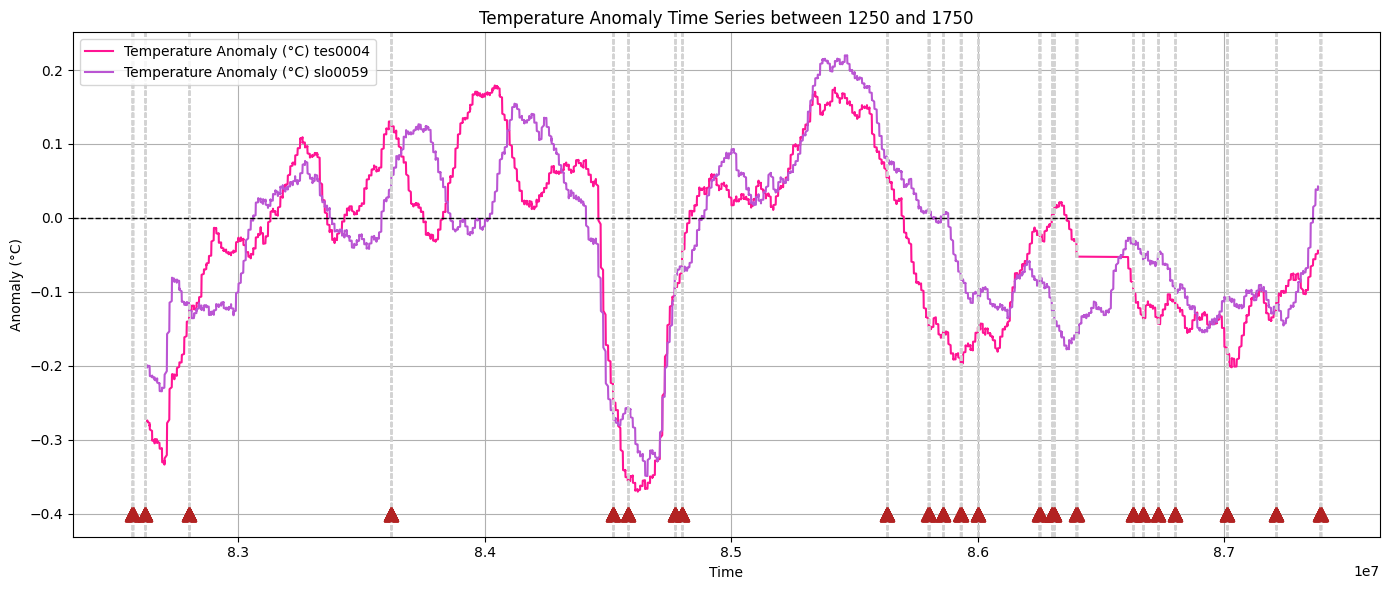

In [38]:
plt.figure(figsize=(14, 6))

# Plot anomalies
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

# Add red triangle markers at volcanic years
for vt in volcano_times:
    plt.axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    plt.plot(vt, -0.4, marker='^', color='firebrick', markersize=10) 

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Labels and legend
plt.title('Temperature Anomaly Time Series between 1250 and 1750')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()